In [2]:
import numpy as np
from numpy import linalg as LA
from scipy.sparse import linalg as SLA
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 9.37 ms


## 1-a

In [ ]:
x_2016 = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw5_markov_chaines/CFB2016_scores.csv', 
          delimiter=',')

team_names = pd.read_csv('/Users/Amiros/GitHub/Machine Learning for Data Science/hw5_markov_chaines/TeamNames.txt',
                        header = None)

In [ ]:
a_index = x_2016[:,0] -1
b_index = x_2016[:,2] -1

a_score = x_2016[:,1]
b_score = x_2016[:,3]

a_indicator = np.where(a_score>b_score,1,0)
b_indicator = np.where(a_score<b_score,1,0)

In [ ]:
M = np.zeros((760, 760))

M[tuple(a_index), tuple(a_index)] = M[tuple(a_index), tuple(a_index)] + a_indicator + a_score/(a_score+b_score)
M[tuple(b_index), tuple(b_index)] = M[tuple(b_index), tuple(b_index)] + b_indicator + b_score/(a_score+b_score)
M[tuple(a_index), tuple(b_index)] = M[tuple(a_index), tuple(b_index)] + b_indicator + b_score/(a_score+b_score)
M[tuple(b_index), tuple(a_index)] = M[tuple(b_index), tuple(a_index)] + a_indicator + b_score/(a_score+b_score)

M_normalize = M/M.sum(axis=1)

In [ ]:
# function to calculate state at t
def update_w(w_0, t):
    w_arr = []
    w = w_0
    for i in range(t):
        w = np.dot(w, M_normalize)
    w_arr = pd.DataFrame(w.T, index= None, columns = ['score'])
    w_arr['team'] = team_names
    return w_arr

In [ ]:
np.random.seed(42)
w_0 = np.random.uniform(low=0.0, high=1.0, size=(1,760))

w_10 = update_w(w_0, 10)
w_100 = update_w(w_0, 100)
w_1000 = update_w(w_0, 1000)
w_10000 = update_w(w_0, 10000)

In [ ]:
w_10000.sort('score', ascending=False).head(25)

## 1-b

In [ ]:
u = SLA.eigs(M,1, sigma=1)[1].T
w_stationary = u/np.sum(u)

In [ ]:
def print_w(w_0, w_stationary, t=2):
    w = w_0
    x = []
    for i in range(t):
        w = np.dot(w, M_normalize)
        x.append(LA.norm(w_stationary-w, ord=1))
    
    plt.figure(num=None, figsize=(10, 10), dpi=80)
    plt.plot(x, linewidth=2)

print_w(w_0, w_stationary, t=10000)

## 2-a

In [3]:
# load the txt file
with open('nyt_data.csv') as f:
    content = f.readlines()
content = [x.strip() for x in content] 

time: 43.6 ms


In [4]:
# initialize X matrix to the size of 3012 words by 8447 documents <3012X8447>
X = np.zeros((3012, 8447), dtype =float)

time: 1.98 ms


In [5]:
# populate X matrix with the values from the loaded file
# where Xij is the number of times word i appears in document j
for i in range(len(content)):    
    doc = content[i].split(",") 
    
    for element in doc:
        parts = element.split(':')
        parts = list(map(int, parts))
        X[parts[0]-1, i] = parts[1]

time: 2.55 s


In [14]:
k = 25
t = 100

W = np.random.uniform(low=1, high=2, size=(3012,25))
H = np.random.uniform(low=1, high=2, size=(25,8447))

time: 12.2 ms


In [15]:
L = []
for i in range(t):
    H = np.multiply(H, W.T.dot(X)/((W.T.dot(W).dot(H)) + 10**-16))
    W = np.multiply(W, X.dot(H.T)/((W.dot(H).dot(H.T)) + 10**-16))
    l = np.multiply(X, np.log(1/W.dot(H))) + W.dot(H)
    L.append(np.nansum(l))

/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


time: 4min 13s


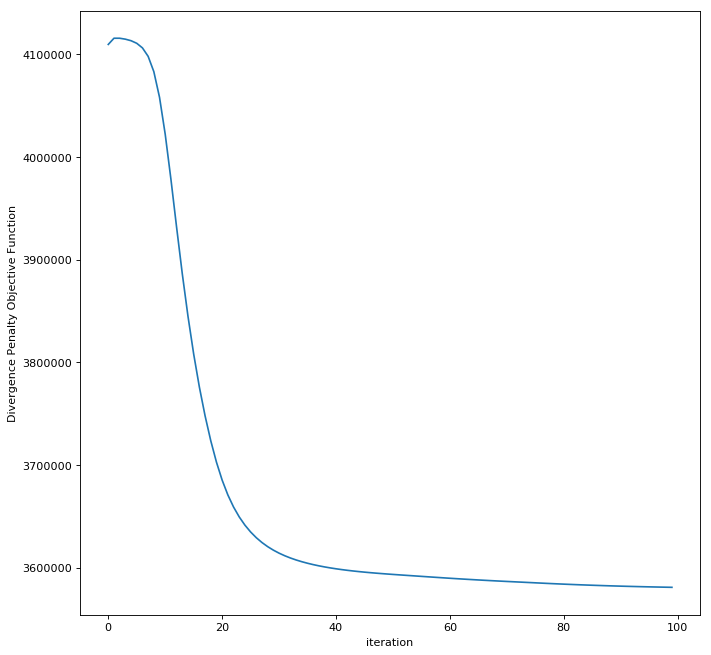

time: 435 ms


In [19]:
plt.figure(num=None, figsize=(10, 10), dpi=80)

plt.plot(L)
plt.xlabel("iteration")
plt.ylabel("Divergence Penalty Objective Function")

## 2-b

In [21]:
from sklearn.preprocessing import normalize

time: 2.08 ms


In [68]:
with open('nyt_vocab.dat') as l:
    word_list = l.readlines()
word_list = [x.strip() for x in word_list] 
word_list_arr = np.asarray(word_list)

'company'

time: 10.7 ms


In [50]:
# normailzie each column to sum to 1
W_norm_df = pd.DataFrame(normalize(W, norm='l1', axis=0))

# rename columns
col_names = []
for i in range(1,26):
    col_names.append('topic_'+ str(i))
    
W_norm_df.columns = col_names

time: 8.3 ms


In [74]:
# W_norm_df.sort('topic_1', ascending=False).head(10)
# a = 

time: 1.64 ms


In [78]:
def sorted(s, num):
    tmp = s.order(ascending=False)[:num]
    tmp.index = range(num)
    return tmp

time: 3.02 ms


In [79]:
W_norm_df.apply(lambda x: sorted(x, 10))

/Users/Amiros/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
0  0.018545  0.039080  0.018327  0.051205  0.037439  0.026168  0.021862   
1  0.013160  0.038193  0.017657  0.039554  0.015656  0.018546  0.014679   
2  0.011885  0.023076  0.015908  0.025964  0.014192  0.016437  0.013860   
3  0.011847  0.016702  0.015399  0.017545  0.011660  0.015294  0.013647   
4  0.010864  0.011012  0.015283  0.016530  0.011151  0.015291  0.011174   
5  0.010229  0.009809  0.015146  0.016407  0.009308  0.012564  0.011133   
6  0.010194  0.009630  0.014511  0.015306  0.008914  0.012471  0.010694   
7  0.009743  0.009258  0.013477  0.014016  0.008808  0.010724  0.009995   
8  0.009121  0.008575  0.011774  0.013441  0.008638  0.010207  0.008986   
9  0.007349  0.008347  0.011655  0.009594  0.008360  0.009901  0.008698   

    topic_8   topic_9  topic_10    ...     topic_16  topic_17  topic_18  \
0  0.010404  0.020523  0.034263    ...     0.053198  0.085255  0.008569   
1  0.007740  0.018477  0.025742    ...     0.033228  0.022657  0.007445   
2  0.007404  0.016648  0.015699    ...     0.019221  0.014503  0.006552   
3  0.006944  0.016493  0.013526    ...     0.017398  0.011937  0.006069   
4  0.006925  0.011693  0.013096    ...     0.012530  0.010088  0.006015   
5  0.006846  0.011394  0.012110    ...     0.011551  0.009590  0.005703   
6  0.006635  0.010610  0.011260    ...     0.011378  0.008933  0.005699   
7  0.006498  0.010161  0.011169    ...     0.010525  0.008336  0.005695   
8  0.005473  0.009310  0.010797    ...     0.010361  0.008073  0.005201   
9  0.005398  0.009188  0.010460    ...     0.009311  0.006933  0.004895   

   topic_19  topic_20  topic_21  topic_22  topic_23  topic_24  topic_25  
0  0.016945  0.030954  0.047474  0.022971  0.024004  0.023959  0.014242  
1  0.014542  0.030935  0.039772  0.022573  0.018290  0.018768  0.013323  
2  0.011214  0.028660  0.034317  0.021076  0.017740  0.017340  0.012002  
3  0.008278  0.025062  0.033517  0.012240  0.017377  0.013045  0.011462  
4  0.008021  0.022635  0.029410  0.011854  0.017148  0.012457  0.009445  
5  0.007864  0.014541  0.028378  0.010901  0.016209  0.011993  0.008546  
6  0.007631  0.010083  0.025622  0.009181  0.014948  0.009894  0.008063  
7  0.007593  0.008854  0.025142  0.008387  0.013904  0.009252  0.006804  
8  0.007388  0.007223  0.024220  0.007827  0.012016  0.008679  0.006613  
9  0.007235  0.006692  0.023530  0.007394  0.011010  0.008279  0.006433  

[10 rows x 25 columns]

time: 109 ms


In [121]:
aa = pd.DataFrame(W_norm_df['topic_3'].nlargest(10))
aa.index.values

array([132,  75, 120, 253, 319, 150, 216, 383, 528,  84])

time: 9.95 ms


In [91]:
np.argsort(W_norm)[0,-10:]

array([13, 11,  9, 16,  6, 23, 18, 20,  8,  4])

time: 7.82 ms


In [125]:
ab = (

time: 2.56 ms


In [151]:
word_list_arr[(np.argsort(W_norm[:,])[-10:])[::-1] -1]

array([['state', 'plan', 'place', 'life', 'states', 'percent', 'company',
        'point', 'man', 'child', 'lucrative', 'official', 'home', 'group',
        'program', 'case', 'school', 'city', 'woman', 'tell', 'report',
        'government', 'game', 'american', 'play'],
       ['report', 'home', 'program', 'plan', 'child', 'school', 'american',
        'official', 'woman', 'group', 'company', 'case', 'city', 'point',
        'place', 'game', 'play', 'percent', 'man', 'states', 'tell',
        'lucrative', 'life', 'government', 'state'],
       ['city', 'point', 'life', 'program', 'report', 'game', 'plan',
        'official', 'place', 'play', 'woman', 'american', 'company',
        'state', 'government', 'percent', 'man', 'group', 'case', 'home',
        'states', 'school', 'child', 'lucrative', 'tell'],
       ['city', 'program', 'american', 'game', 'lucrative', 'group',
        'plan', 'states', 'woman', 'company', 'place', 'state', 'life',
        'official', 'tell', 'government', '

time: 9.52 ms


In [149]:
# for i in range(25)
word_list_arr[(np.argsort(W_norm[:,0])[-10:])[::-1] - 1]

array(['public', 'fall', 'police', 'cost', 'world', 'talk', 'second',
       'money', 'send', 'business'], 
      dtype='<U14')

time: 4.91 ms
